<a href="https://colab.research.google.com/github/minhcong00/AI/blob/main/Nhan_Dien_Khuon_mat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/FACE/FACE_train/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('MinhCong'):
    output = 0.0
  if file.startswith('MinhTam'):
    output = 1.0
  if file.startswith('NhutBien'):
    output = 2.0
  if file.startswith('TanLong'):
    output = 3.0

  photo = load_img(folder + file, target_size =(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)


(279, 200, 200, 3) (279,)


In [3]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/FACE/FACE_test/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('MinhCong'):
    output = 0.0
  if file.startswith('MinhTam'):
    output = 1.0
  if file.startswith('NhutBien'):
    output = 2.0
  if file.startswith('TanLong'):
    output = 3.0

  photo = load_img(folder + file, target_size =(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape, labels_test.shape)


(106, 200, 200, 3) (106,)


In [4]:
from keras.utils import  to_categorical

photos_train = photos_train.reshape(279, 200, 200, 3)
photos_train = photos_train.astype('float32')/255 
photos_test = photos_test.reshape(106, 200, 200, 3)
photos_test = photos_test.astype('float32')/255

labels_train = to_categorical(labels_train,4)
labels_test = to_categorical(labels_test,4)

print(photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape)

(279, 200, 200, 3) (279, 4) (106, 200, 200, 3) (106, 4)


In [5]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU

batch_size = 64
epochs = 30
classes = 4

model = Sequential()
#tich chap 32 lan
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',input_shape = (200,200,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tich chap 64 lan
model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tich chap 128 lan
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#ANN
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [6]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy',metrics = ['accuracy'])
train = model.fit(photos_train, labels_train, batch_size = batch_size ,epochs = epochs, verbose = 1)
test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('Do chinh xac', test_acc)
print('Do mat mat', test_loss)

Epoch 1/30
5/5 [==============================] - 12s 234ms/step - loss: 2.7437 - accuracy: 0.4337
Epoch 2/30
5/5 [==============================] - 0s 79ms/step - loss: 0.1126 - accuracy: 0.9964
Epoch 3/30
5/5 [==============================] - 0s 77ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4/30
5/5 [==============================] - 0s 77ms/step - loss: 2.2874e-05 - accuracy: 1.0000
Epoch 5/30
5/5 [==============================] - 0s 79ms/step - loss: 7.9327e-06 - accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 0s 77ms/step - loss: 1.5600e-05 - accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 0s 77ms/step - loss: 1.1198e-05 - accuracy: 1.0000
Epoch 8/30
5/5 [==============================] - 0s 78ms/step - loss: 4.5250e-06 - accuracy: 1.0000
Epoch 9/30
5/5 [==============================] - 0s 77ms/step - loss: 1.7116e-06 - accuracy: 1.0000
Epoch 10/30
5/5 [==============================] - 0s 77ms/step - loss: 8.5795e-07 - accuracy: 1.0000

In [7]:
model.save('drive/MyDrive/FACE/modelNhandangKhuonMat.h5')

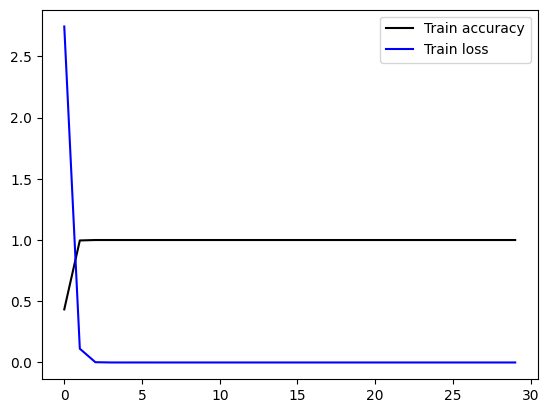

In [8]:
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

1/1 [==============================] - 0s 20ms/step
Giá trị: 0
1/1 [==============================] - 0s 17ms/step
MinhCong
1/1 [==============================] - 0s 19ms/step


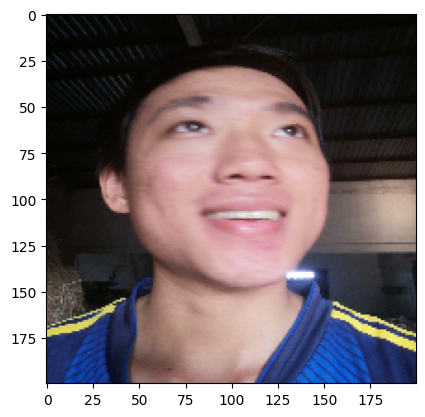

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/FACE/MinhCong.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('MinhCong')
if np.argmax(model.predict(img)) == 1:
   print('MinhTam')
if np.argmax(model.predict(img)) == 2:
   print('NhutBien')
if np.argmax(model.predict(img)) == 3:
   print('TanLong')

1/1 [==============================] - 0s 20ms/step
Giá trị: 3
1/1 [==============================] - 0s 21ms/step
TanLong


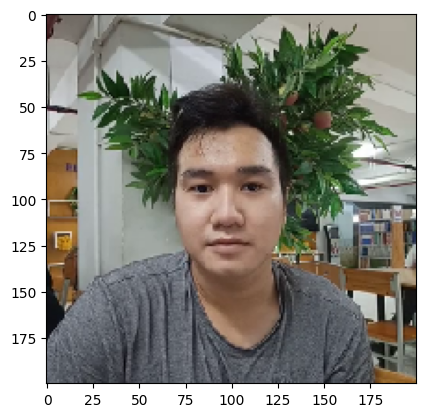

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/FACE/TanLong.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('MinhCong')
if np.argmax(model.predict(img)) == 1:
   print('MinhTam')
if np.argmax(model.predict(img)) == 2:
   print('NhutBien')
if np.argmax(model.predict(img)) == 3:
   print('TanLong')

1/1 [==============================] - 0s 20ms/step
Giá trị: 1
1/1 [==============================] - 0s 24ms/step
MinhTam
1/1 [==============================] - 0s 20ms/step


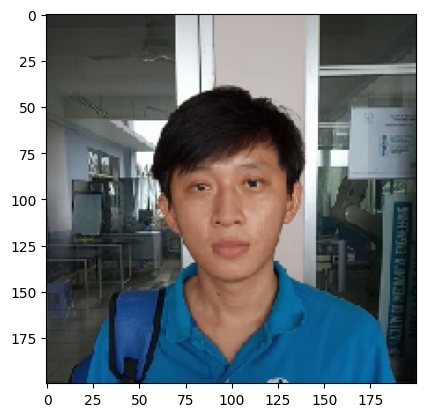

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/FACE/MinhTam.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('MinhCong')
if np.argmax(model.predict(img)) == 1:
   print('MinhTam')
if np.argmax(model.predict(img)) == 2:
   print('NhutBien')
if np.argmax(model.predict(img)) == 3:
   print('TanLong')

1/1 [==============================] - 0s 28ms/step
Giá trị: 2
1/1 [==============================] - 0s 26ms/step
NhutBien
1/1 [==============================] - 0s 37ms/step


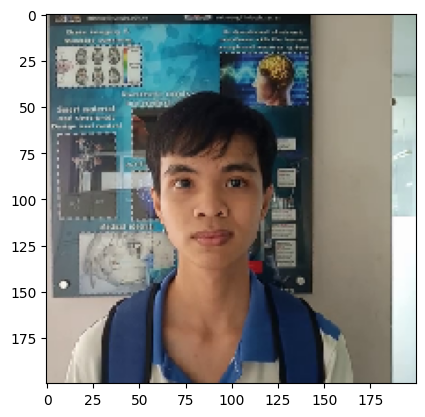

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/FACE/NhutBien.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('MinhCong')
if np.argmax(model.predict(img)) == 1:
   print('MinhTam')
if np.argmax(model.predict(img)) == 2:
   print('NhutBien')
if np.argmax(model.predict(img)) == 3:
   print('TanLong')